In [1]:
import warnings
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
import itertools
from IPython.display import clear_output
import operator
from collections import Counter

In [2]:
warnings.filterwarnings('ignore')
matplotlib.style.use('ggplot')

In [3]:
def createCombinations(len):   # WARNING! словарь без пре- и постамбулы 
    
    '''Функция возвращает словарь с комбинациями двоичного сигнала без повторений\n
    ключ словаря - номер сквока в десятичной системе\n
    значение ключа - двоичный код десятичного ключа\n
    P.S. по сути соблюдается декодирование двоичного кода сквока'''
    
    dictOfSeq = dict()
    c = 0
    for i in itertools.product('01', repeat=len):
        s = ''.join(i)
        # s = s[:6] + "0" + s[6:] # вставка позиции Х, которая всегда равна нулю
        dictOfSeq[str(c)] = list(s)
        c = int(c)
        c += 1
    
    return dictOfSeq

def to_Dex(input):

    '''Функция выполняет декодирование двоичного сигнала сквока и возвращает десятичное число\n

    Parameters
    ----------
        input : dtype = int, двоичное число\n'''

    bin = str()
    input = str(input)

    n1 = int(input[1])*1 + int(input[3])*2 + int(input[5])*4
    n2 = int(input[7])*1 + int(input[9])*2 + int(input[11])*4
    n3 = int(input[0])*1 + int(input[2])*2 + int(input[4])*4
    n4 = int(input[8])*1 + int(input[10])*2 + int(input[12])*4
    
    bin = int(str(n1) + str(n2) + str(n3) + str(n4))

    return bin

def to_Bin(number): # лютый хардкод (╯°□°）╯︵ ┻━┻, ужас, потом переделать 
    number = str(number)
    binNumber = list('0000000000000')

    dictOfRule = {
        '0' : [0, 0, 0],
        '1' : [1, 0, 0],
        '2' : [0, 1, 0],
        '3' : [1, 1, 0],
        '4' : [0, 0, 1],
        '5' : [1, 0, 1],
        '6' : [0, 1, 1],
        '7' : [1, 1, 1]
    }
    while(len(number)<4):
        number = '0' + number

    binNumber[0] = dictOfRule[number[2]][0]
    binNumber[1] = dictOfRule[number[0]][0]
    binNumber[2] = dictOfRule[number[2]][1]
    binNumber[3] = dictOfRule[number[0]][1]
    binNumber[4] = dictOfRule[number[2]][2]
    binNumber[5] = dictOfRule[number[0]][2]
    binNumber[6] = 0
    binNumber[7] = dictOfRule[number[1]][0]
    binNumber[8] = dictOfRule[number[3]][0]
    binNumber[9] = dictOfRule[number[1]][1]
    binNumber[10] = dictOfRule[number[3]][1]
    binNumber[11] = dictOfRule[number[1]][2]
    binNumber[12] = dictOfRule[number[3]][2]

    bin = str()
    for i in binNumber:
        bin = bin + str(i)

    return bin

def getIndexes(input):
    ind = list()
    for i in range(len(input)):
        if input[i] == '1':
            ind.append(i)
            
    return ind

def rabotaet(): #пока работает - не трогать, если что, то заменить вместо функции
    for i in comb:
        count = 0
        listLine = list(origLine)
        row = list(data.iloc[z,1:])
        for j in indOfOrig:
            listLine[j] = comb[i][count]
            if listLine[j] == '0':
                row[rules[j][0]] = noise.iloc[z,rules[j][0]]
                row[rules[j][1]] = noise.iloc[z,rules[j][1]]
                row[rules[j][2]] = noise.iloc[z,rules[j][2]]
            count += 1
        line = ''.join(listLine)
        row.insert(0, to_Dex(line))
        dictOfSome[z] = row
        
    return dictOfSome

In [37]:
data = pd.read_csv("../data/original/DataSet_Signal.csv" , delimiter=';')
noise = pd.read_csv("..//data//original//DataSet_Noise.csv")

In [39]:
sq_uniq = data['label'].unique()
sq_uniq

array([ 615, 1220, 1524, 1551, 2042, 2175, 2403, 2404, 2406, 2421, 2422,
       2454, 2457, 5124, 5224, 5401, 5724, 6224, 6234, 6737, 7360, 7624],
      dtype=int64)

In [40]:
listOfPoints = [2, 8, 14, 19, 25, 31, 37, 43, 49, 54, 60, 66, 72, 77, 83]  # порядковый номер столбцов в датасете соответствующий информационным импульсам (взят из excel)

rules = {
    0: [7,8,9],
    1: [13,14,15],
    2: [18,19,20],
    3: [24,25,26],
    4: [30,31,32],
    5: [36,37,38],
    6: [42,43,44],
    7: [48,49,50],
    8: [53,54,55],
    9: [59,60,61],
    10: [65,66,67],
    11: [71,72,73],
    12: [76,77,78]
}

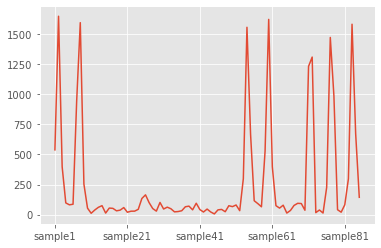

In [41]:
dictOfSq = dict()

data.loc[data['label']==sq_uniq[0]].iloc[0,1:].plot()

In [42]:
noise

,label,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample76,sample77,sample78,sample79,sample80,sample81,sample82,sample83,sample84,sample85
0,0,88.865,48.094,42.154,53.4130,25.495,21.9540,13.892,64.661,19.026,...,74.673,158.620,37.656,56.036,44.777,55.073,36.056,8.0623,28.862,40.460
1,0,72.993,38.833,46.755,37.4830,67.676,35.4680,41.485,44.385,78.109,...,67.676,46.098,91.482,58.138,24.698,47.170,44.654,41.3040,31.064,31.401
2,0,40.804,10.817,56.727,39.6990,48.270,33.6150,48.104,75.027,76.942,...,90.918,45.044,63.253,33.615,38.000,73.000,57.559,86.5390,53.038,58.310
3,0,23.000,18.385,81.413,105.5100,92.801,38.0790,51.865,36.674,16.125,...,23.345,21.190,24.698,43.909,13.038,77.058,54.083,42.4500,75.273,71.309
4,0,70.612,33.377,97.046,79.0250,66.219,8.2462,107.840,86.023,13.038,...,27.295,55.444,37.216,48.260,62.936,78.791,52.479,26.2490,32.450,70.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46270,0,18.868,33.956,99.765,8.0623,41.400,17.2050,57.219,11.402,67.417,...,74.330,67.978,60.415,75.604,12.207,71.847,33.242,33.3770,72.069,13.342
46271,0,30.594,47.127,59.481,63.0710,47.000,51.8840,35.171,61.855,36.620,...,63.127,73.539,56.321,52.345,114.620,27.459,43.012,53.6000,77.621,47.413
46272,0,22.361,35.000,36.000,49.6790,62.514,108.1700,58.523,29.120,73.546,...,10.198,16.279,47.127,17.804,48.000,31.016,65.000,99.8250,84.172,64.537
46273,0,53.600,44.777,34.059,44.6540,57.428,9.4340,45.607,98.509,54.918,...,21.401,72.173,44.922,61.074,47.074,121.740,87.321,43.2670,43.600,62.626


In [44]:
dictOfSome = dict()
indDict = 0
n = 0
for z in data.index:
    origLine = to_Bin(int(data.iloc[z][0]))
    indOfOrig = getIndexes(origLine)
    comb = createCombinations(len(indOfOrig))
    origl = list(origLine)
    
    for i in comb:
        count = 0
        listLine = list(origLine)
        row = list(data.iloc[z,1:])
        
        for j in indOfOrig:
            listLine[j] = comb[i][count]
            
            if listLine[j] == '0':
                row[rules[j][0]] = noise.iloc[z,rules[j][0]]
                row[rules[j][1]] = noise.iloc[z,rules[j][1]]
                row[rules[j][2]] = noise.iloc[z,rules[j][2]]
                
            count += 1
            
        line = ''.join(listLine)
        row.insert(0, to_Dex(line))
        dictOfSome[indDict] = row
        indDict += 1
    n += 1
 
    clear_output(wait=True)
    print("status:\t", z/43999* 100, "%")


status:	 0.47501079569990223 %


KeyboardInterrupt: 

In [10]:
df = pd.DataFrame(data=dictOfSome.values(), columns=data.columns)
df

,label,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample76,sample77,sample78,sample79,sample80,sample81,sample82,sample83,sample84,sample85
0,0,537.90,1647.90,396.92,97.252,81.320,86.279,941.600,13.892,64.661,...,226.21,74.673,158.62,37.656,20.248,81.615,297.470,1581.6,672.33,143.850
1,4,537.90,1647.90,396.92,97.252,81.320,86.279,941.600,13.892,64.661,...,226.21,1471.800,985.31,40.706,20.248,81.615,297.470,1581.6,672.33,143.850
2,400,537.90,1647.90,396.92,97.252,81.320,86.279,941.600,13.892,64.661,...,226.21,74.673,158.62,37.656,20.248,81.615,297.470,1581.6,672.33,143.850
3,404,537.90,1647.90,396.92,97.252,81.320,86.279,941.600,13.892,64.661,...,226.21,1471.800,985.31,40.706,20.248,81.615,297.470,1581.6,672.33,143.850
4,200,537.90,1647.90,396.92,97.252,81.320,86.279,941.600,13.892,64.661,...,226.21,74.673,158.62,37.656,20.248,81.615,297.470,1581.6,672.33,143.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175995,7424,119.92,441.37,326.08,10.050,47.381,70.725,69.971,21.024,53.235,...,67.00,224.200,488.08,63.063,57.706,71.028,66.603,368.6,405.21,53.075
4175996,7220,119.92,441.37,326.08,10.050,47.381,70.725,69.971,21.024,53.235,...,67.00,39.051,46.40,41.881,57.706,71.028,66.603,368.6,405.21,53.075
4175997,7224,119.92,441.37,326.08,10.050,47.381,70.725,69.971,21.024,53.235,...,67.00,224.200,488.08,63.063,57.706,71.028,66.603,368.6,405.21,53.075
4175998,7620,119.92,441.37,326.08,10.050,47.381,70.725,69.971,21.024,53.235,...,67.00,39.051,46.40,41.881,57.706,71.028,66.603,368.6,405.21,53.075


In [18]:
df.to_csv('.\\out\\squawk_v4.csv')

In [ ]:
# ------------------------------------------

In [15]:
df = pd.read_csv('.\\out\\squawk_v4.csv')

In [25]:
df = df.drop('Unnamed: 0', axis=1)
df.head(5)


,label,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample76,sample77,sample78,sample79,sample80,sample81,sample82,sample83,sample84,sample85
0,0,537.9,1647.9,396.92,97.252,81.32,86.279,941.6,13.892,64.661,...,226.21,74.673,158.62,37.656,20.248,81.615,297.47,1581.6,672.33,143.85
1,4,537.9,1647.9,396.92,97.252,81.32,86.279,941.6,13.892,64.661,...,226.21,1471.800,985.31,40.706,20.248,81.615,297.47,1581.6,672.33,143.85
2,400,537.9,1647.9,396.92,97.252,81.32,86.279,941.6,13.892,64.661,...,226.21,74.673,158.62,37.656,20.248,81.615,297.47,1581.6,672.33,143.85
3,404,537.9,1647.9,396.92,97.252,81.32,86.279,941.6,13.892,64.661,...,226.21,1471.800,985.31,40.706,20.248,81.615,297.47,1581.6,672.33,143.85
4,200,537.9,1647.9,396.92,97.252,81.32,86.279,941.6,13.892,64.661,...,226.21,74.673,158.62,37.656,20.248,81.615,297.47,1581.6,672.33,143.85


In [10]:
df_uniq = df['label'].unique()
dictOfSize = dict()
for i in df_uniq:
    size = df.loc[df['label']==i].shape[0]
    dictOfSize[i] = size

df_size = pd.DataFrame.from_dict(dictOfSize, orient='index',columns=['amount'])
df_size

,amount
0,44000
4,28000
400,28000
404,18000
200,18000
...,...
7420,2000
7424,2000
7224,2000
7620,2000


<BarContainer object of 1328 artists>

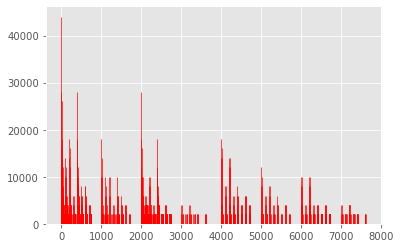

In [11]:
fig, ax = plt.subplots()
ax.bar(dictOfSize.keys(),dictOfSize.values(), width=1, edgecolor="red", linewidth=0.7)

status:	 100.0 %


<BarContainer object of 1328 artists>

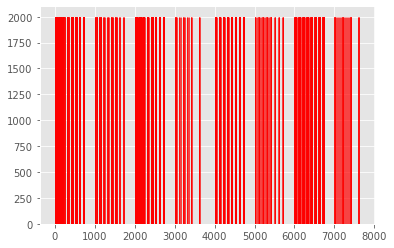

In [90]:
tmp = list()
iter = 0
for i in df_uniq:
    tmp.append(df.loc[df['label']==i].iloc[:2000,:])
    iter += 1
    clear_output(wait=True)
    print("status:\t", iter/df_uniq.shape[0] * 100, "%")

dfEdited = pd.concat(tmp,ignore_index=True)

dfEdited_uniq = dfEdited['label'].unique()
dictOfSize = dict()
for i in dfEdited_uniq:
    size = dfEdited.loc[dfEdited['label']==i].shape[0]
    dictOfSize[i] = size

df_size = pd.DataFrame.from_dict(dictOfSize, orient='index',columns=['amount'])
fig, ax = plt.subplots()
ax.bar(dictOfSize.keys(),dictOfSize.values(), width=1, edgecolor="red", linewidth=0.7)
    

In [93]:
dfEdited.to_csv('.\\out\\dfEdited.csv')

In [91]:
# -----------------------------------------

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation 
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.python.keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pandas as pd

In [2]:
data = pd.read_csv('dfEdited.csv')
# data = pd.read_csv('DataSet_Signal.csv', delimiter = ';')

In [3]:
data.head(5)

,Unnamed: 0,label,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,...,sample76,sample77,sample78,sample79,sample80,sample81,sample82,sample83,sample84,sample85
0,0,0,537.90,1647.9,396.92,97.252,81.320,86.279,941.60,13.892,...,226.210,74.673,158.620,37.656,20.248,81.6150,297.470,1581.6,672.33,143.850
1,1,0,212.90,1657.5,1134.00,91.082,151.400,55.902,434.19,41.485,...,83.217,67.676,46.098,91.482,40.012,31.0640,81.615,1394.2,1494.40,53.085
2,2,0,105.22,1385.6,1053.30,125.210,18.248,51.856,265.71,48.104,...,51.624,90.918,45.044,63.253,69.116,63.1590,76.164,1134.3,1245.20,90.609
3,3,0,123.49,1548.1,1051.50,122.070,44.944,87.235,397.85,51.865,...,58.856,23.345,21.190,24.698,84.971,17.1170,51.478,1375.5,1367.00,39.661
4,4,0,238.45,1584.0,833.78,108.240,33.838,128.320,528.78,107.840,...,51.856,27.295,55.444,37.216,47.043,9.2195,106.780,1380.3,1148.10,97.350


In [4]:
data = data.drop('Unnamed: 0', axis=1)
data.head(5)

,label,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample76,sample77,sample78,sample79,sample80,sample81,sample82,sample83,sample84,sample85
0,0,537.90,1647.9,396.92,97.252,81.320,86.279,941.60,13.892,64.661,...,226.210,74.673,158.620,37.656,20.248,81.6150,297.470,1581.6,672.33,143.850
1,0,212.90,1657.5,1134.00,91.082,151.400,55.902,434.19,41.485,44.385,...,83.217,67.676,46.098,91.482,40.012,31.0640,81.615,1394.2,1494.40,53.085
2,0,105.22,1385.6,1053.30,125.210,18.248,51.856,265.71,48.104,75.027,...,51.624,90.918,45.044,63.253,69.116,63.1590,76.164,1134.3,1245.20,90.609
3,0,123.49,1548.1,1051.50,122.070,44.944,87.235,397.85,51.865,36.674,...,58.856,23.345,21.190,24.698,84.971,17.1170,51.478,1375.5,1367.00,39.661
4,0,238.45,1584.0,833.78,108.240,33.838,128.320,528.78,107.840,86.023,...,51.856,27.295,55.444,37.216,47.043,9.2195,106.780,1380.3,1148.10,97.350


In [5]:
# разделяем предикторы и отклик
Y_data = data['label'] # идентификатор сигнала сквока
X_data = data.drop(['label'], axis=1)  # сигнал сквока


In [6]:
# замена предикторов в виде номеров сквока на порядковый номер
nr_classes = data['label'].unique().shape[0]; # количество классов (номеров сквоков) в наборе данных
n_squawk = 2000; # количество сигналов сквоков одного класса

num = np.zeros((n_squawk*nr_classes,))
tmp = np.ones((n_squawk, ))
for i in range(0,nr_classes):
    num[(i*n_squawk):((i+1)*n_squawk),] = tmp*(i)

Y_dataN = num # массив предикторов, состоящий из порядковых номера


In [7]:
# разделение на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X_data.values, Y_dataN, 
                                                  test_size=0.1, 
                                                  random_state=42)


In [8]:
# обучающая выборка
X_train_flt = X_train.astype('float32')
Y_train_flt = Y_train.astype('float32')
# тестовая выборка
X_test_flt = X_test.astype('float32')
Y_test_flt = Y_test.astype('float32')


In [9]:
# нормировка входных значений
X_train_norm = (X_train_flt.T[:,:] - X_train_flt.T[:,:].mean())/ X_train_flt.T[:,:].std()
X_test_norm = (X_test_flt.T[:,:] - X_test_flt.T[:,:].mean())/ X_test_flt.T[:,:].std()

X_train_norm = X_train_norm.T
X_test_norm = X_test_norm.T


In [10]:
# бинарное кодирование предикторов
Y_train_bin = np_utils.to_categorical(Y_train_flt, nr_classes) 
Y_test_bin = np_utils.to_categorical(Y_test_flt, nr_classes)


In [11]:
# структура сети
model = Sequential()
model.add(Dense(18, input_shape=(85,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nr_classes))
model.add(Activation('softmax'))


In [12]:
model.summary() # описание модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                1548      
                                                                 
 activation (Activation)     (None, 18)                0         
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_1 (Dense)             (None, 1328)              25232     
                                                                 
 activation_1 (Activation)   (None, 1328)              0         
                                                                 
Total params: 26,780
Trainable params: 26,780
Non-trainable params: 0
_________________________________________________________________


In [13]:
# параметры обучения
model.compile(loss = 'categorical_crossentropy', 
              optimizer = Adam(),
              metrics = ['accuracy'])


In [14]:
del(data, X_data, X_test, X_train, X_test_flt, Y_data, Y_dataN, Y_test, Y_train, num)


In [15]:
# параметры сети
np.random.seed(1337)  
batch_size = 100 
nr_iterations = 3

net_res_1 = model.fit(X_train_norm, Y_train_bin, 
                      batch_size = batch_size, epochs = nr_iterations, 
                      verbose = 1, 
                      validation_data = (X_test_norm, Y_test_bin))                         


Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23887/23904 [============================>.] - ETA: 0s - loss: 3.3442 - accuracy: 0.2341WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000023634FFB700> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach 

In [16]:
predictions = model.predict(X_test_norm) 
score = model.evaluate(X_test_norm, Y_test_bin, verbose = 0)
print(score)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0.24720874428749084, 0.9912801384925842]


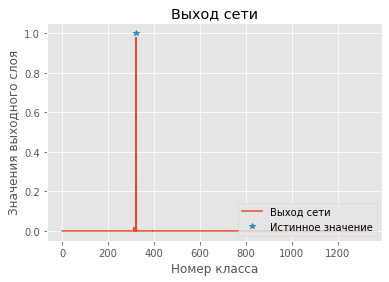

In [17]:
# выход сети
n_ind = 12; # номер выборки
plt.title('Выход сети')
plt.plot(range(0,1328), predictions[n_ind,0:], label = 'Выход сети')
plt.plot(Y_test_flt[n_ind,], 1 , '*', label = 'Истинное значение')
plt.legend(loc = 'lower right')
plt.ylabel('Значения выходного слоя')
plt.xlabel('Номер класса');

In [18]:
pred = np.argmax(predictions, axis = 1)
target_test = np.argmax(Y_test_bin, axis = 1)

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [ ]:
cm = confusion_matrix(pred, target_test)
ax = sn.heatmap(cm, annot=True,fmt='g')


Error in sys.excepthook:
MemoryError

Original exception was:
Traceback (most recent call last):
  File "C:\Users\User-134766\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\User-134766\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 750, in call_soon
    handle = self._call_soon(callback, args, context)
  File "C:\Users\User-134766\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 766, in _call_soon
    handle = events.Handle(callback, args, self, context)
MemoryError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\User-134766\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\User-134766\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    e